In [3]:
import numpy as np
import scipy.stats
import pandas as pd


In [4]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [5]:
import re
import mailbox
import csv

In [6]:
gapminder = pd.read_csv('gapminder.csv')

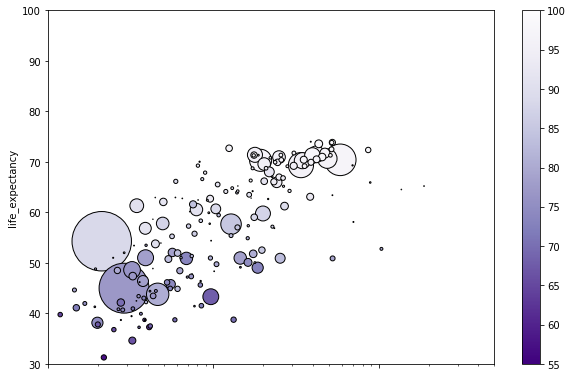

In [14]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending = False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx = True, s = area, c = color, colormap = matplotlib.cm.get_cmap('Purples_r'), vmin = 55, vmax = 100,
                      linewidths = 1, edgecolors = 'k', figsize = (10,6.5))
    pp.axis(xmin = 1, xmax = 500, ymin = 30, ymax = 100)
plotyear(1965)

In [15]:
interact(plotyear, year = range(1965, 2016, 10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [17]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

AttributeError: 'Line2D' object has no property 'colors'

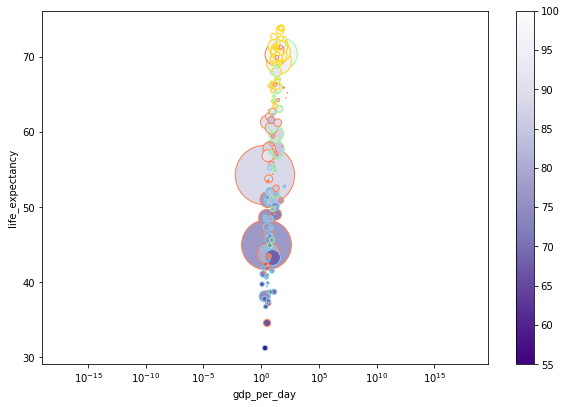

In [23]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending = False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx = True, s = area, c = color, 
                      colormap = matplotlib.cm.get_cmap('Purples_r'), vmin = 55, vmax = 100,
                      linewidths = 1, edgecolors = edgecolor, sharex = False,
                      figsize = (10,6.5))
    
    
    for level in [4,16,64]:
        pp.axvline(level, linestyle = ':', colors = 'k')
    pp.axis(xmin = 1, xmax = 500, ymin = 30, ymax = 100)
plotyear(1965)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CC975AF48>,
      dtype=object)

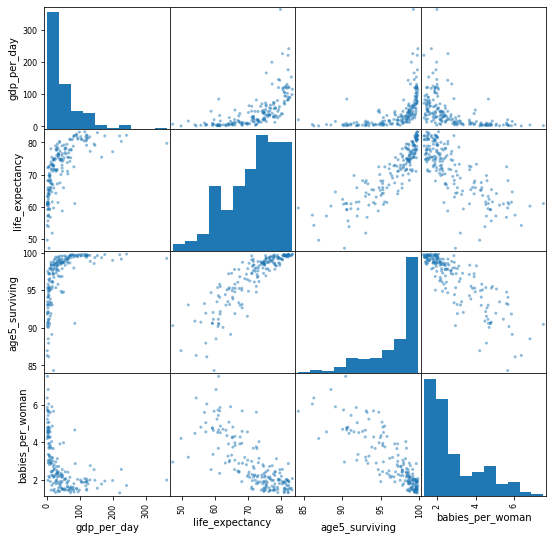

In [30]:
gapminder['log10_gpd_per_day']= np.log10(data['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015, ['gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]

pandas.plotting.scatter_matrix(data, figsize=(9,9))